## Simple Regression Using Tesorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10
X, y

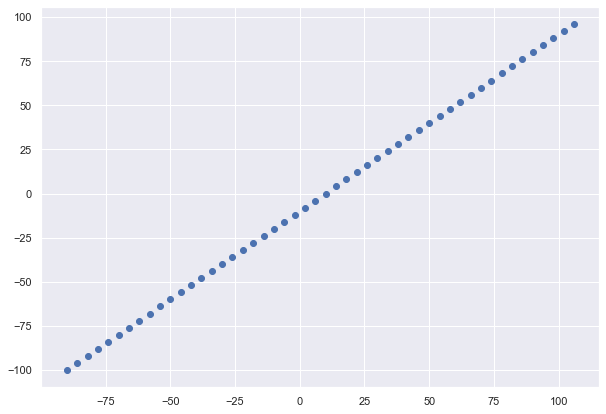

In [3]:
plt.figure(figsize=[10, 7])
plt.scatter(y, X)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), random_state=42, test_size=0.2,  shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), random_state=42, test_size=0.2)

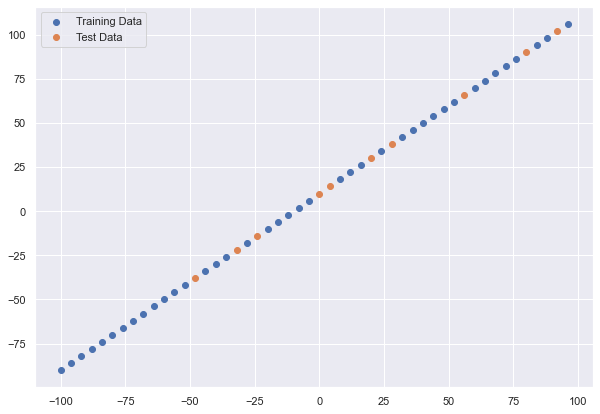

In [5]:
plt.figure(figsize=[10, 7])
# plot X_train, y_train
plt.scatter(X_train, y_train, label='Training Data')
# plot X_test, y_test
plt.scatter(X_test, y_test, label='Test Data')
plt.legend()
plt.show()

In [6]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])

# 3. fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

Text(0, 0.5, 'loss')

<Figure size 720x504 with 0 Axes>

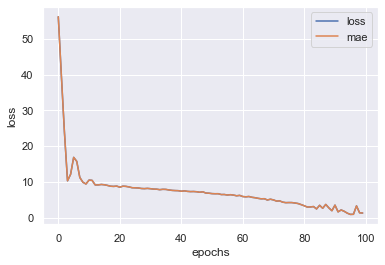

In [7]:
# ploting history
plt.figure(figsize=[10, 7])
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [8]:
y_pred = model.predict(X_test)
y_pred

array([[-36.057102],
       [ 63.686234],
       [ 29.159695],
       [ 86.703926],
       [-20.711977],
       [ 98.21277 ],
       [ 13.814566],
       [  9.978283],
       [ 36.832256],
       [-13.039412]], dtype=float32)

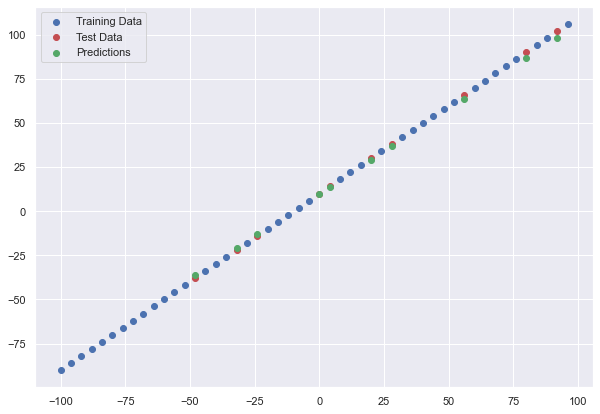

In [9]:
plt.figure(figsize=[10, 7])
# plot X_train, y_train
plt.scatter(X_train, y_train, label='Training Data')
# plot X_test, y_test
plt.scatter(X_test, y_test, c='r', label='Test Data')
# plot y_pred
plt.scatter(X_test, y_pred, c='g', label='Predictions')
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


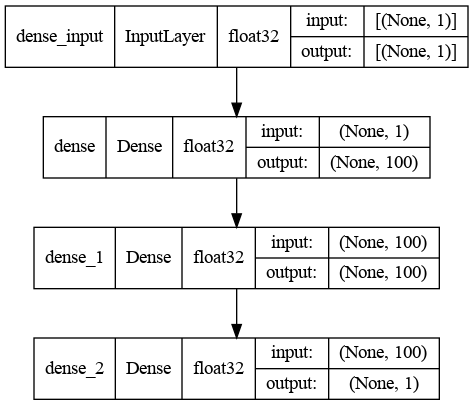

In [11]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, to_file='../model_plot/simple-regression.png')